In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
train_dir = "/content/drive/MyDrive/dataset/images/train"
validation_dir = "/content/drive/MyDrive/dataset/images/validation"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
num_classes = 10
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 399 images belonging to 10 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    validation_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 101 images belonging to 10 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.05):
            print()
            print("Reached almost 100% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = callBack()

In [ ]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 25

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    callbacks=callbacks
)

<ipython-input-19-7092300f027f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
4/4 [==============================] - 221s 55s/step - loss: 2.5489 - accuracy: 0.1604 - val_loss: 2.0068 - val_accuracy: 0.3366
Epoch 2/25
4/4 [==============================] - 98s 25s/step - loss: 1.5755 - accuracy: 0.4586 - val_loss: 1.3287 - val_accuracy: 0.5545
Epoch 3/25
4/4 [==============================] - 100s 26s/step - loss: 0.9703 - accuracy: 0.7243 - val_loss: 0.9189 - val_accuracy: 0.7228
Epoch 4/25
4/4 [==============================] - 96s 25s/step - loss: 0.6109 - accuracy: 0.8747 - val_loss: 0.6933 - val_accuracy: 0.8020
Epoch 5/25
4/4 [==============================] - 99s 26s/step - loss: 0.4171 - accuracy: 0.9123 - val_loss: 0.5425 - val_accuracy: 0.8713
Epoch 6/25
4/4 [==============================] - 99s 26s/step - loss: 0.2911 - accuracy: 0.9524 - val_loss: 0.4474 - val_accuracy: 0.9010
Epoch 7/25
4/4 [==============================] - 97s 25s/step - loss: 0.2141 - accuracy: 0.9825 - val_loss: 0.3868 - val_accuracy: 0.9109
Epoch 8/25
4/4 [=========

In [ ]:
model.save('classifier_resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


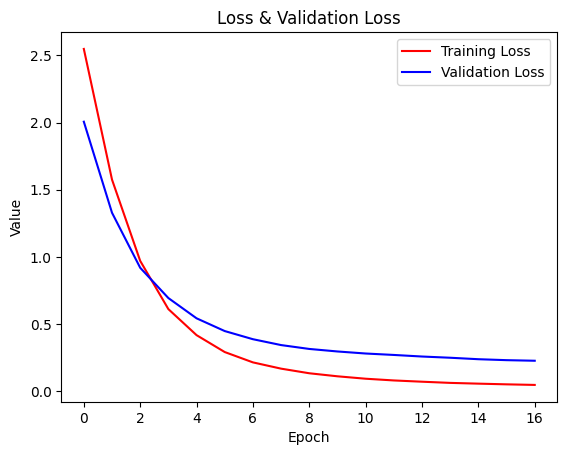

In [ ]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

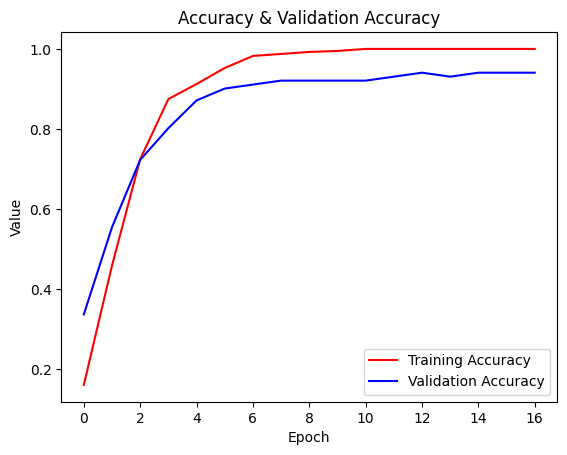

In [ ]:
# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from keras.models import load_model
# from keras.preprocessing import image
# import numpy as np
# import io
# from google.colab import files

# model = load_model('classifier_resnet_model.h5')
# uploaded = files.upload()

# for filename in uploaded.keys():
#     img_bytes = uploaded[filename]
#     img = Image.open(io.BytesIO(img_bytes))
#     img = img.resize((224, 224))
#     img = np.array(img) / 255.0
#     img = np.expand_dims(img, axis=0)
#     plt.imshow(img[0])
#     plt.axis('off')
#     plt.show()

# predictions = model.predict(img)
# predicted_class = np.argmax(predictions)
# predicted_class_label = class_labels[predicted_class_index]
# print("Predicted Class:", predicted_class_label)

